I understand. Let's create a simulator for the "Nutrition and Fertilization" pillar, focusing on the "Nutrient concentration (EC)" parameter. We'll follow the structure you've provided to ensure all necessary code is available.

# Step 1: Define the Healthy Ranges
For our simulation, we'll use the nutrient concentration (EC) as an example from the "Nutrition and Fertilization" pillar. The healthy range for EC is 1.2-2.2 mS/cm.

# Step 2: Create the Simulator
First, let's define the necessary functions and classes:

The generate_data function for creating the telemetry data.
The IoTDevice base class.
The MQTTPublisher class for simulating data publishing.
(Note: The code for the IoTDevice and MQTTPublisher classes remains the same as in the previous example.)

In [1]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import logging
import paho.mqtt.client as mqtt
import os

# Ensure the directory exists
log_dir = 'logs'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Configure logging
log_file = os.path.join(log_dir, 'log.txt')
logging.basicConfig(filename=log_file, level=logging.ERROR, 
                    format='%(asctime)s [%(levelname)s]: %(message)s')


# Function to generate telemetry data
def generate_data(mean, std_dev, size=100):
    return np.random.normal(mean, std_dev, size)

# Base IoT Device Class
class IoTDevice:
    """
    Represents a base class for an IoT device responsible for monitoring plant conditions.
    
    Attributes:
    - device_id (str): Unique identifier for the device.
    - location (str): Location where the device is placed.
    - telemetry_data (dict): Stores the telemetry data of the device.
    - status (str): Represents the connectivity status of the device. Can be 'online' or 'offline'.
    """
    def __init__(self, device_id, location):
        """
        Initializes the IoTDevice with a device ID and location.
        
        Args:
        - device_id (str): Unique identifier for the device.
        - location (str): Location where the device is placed.
        """
        self.device_id = device_id
        self.location = location
        self.telemetry_data = {}
        self.status = "offline"
    def connect(self):
        """
        Connects the device, changing its status to 'online'.
        """
        self.status = "online"
    def disconnect(self):
        """
        Disconnects the device, changing its status to 'offline'.
        """
        self.status = "offline"
    def send_telemetry(self, data):
        """
        Sends telemetry data from the device, typically to an external server or database.
        
        Args:
        - data (dict): Telemetry data to be sent.
        
        Note: 
        Actual logic to send telemetry data (e.g., via MQTT) should be implemented.
        """
        # Logic to send telemetry data, e.g., via MQTT
        pass
        
    def simulate_telemetry(self):
        """
        Simulates telemetry data for the device. 
        This method can be overridden by subclasses to provide specific simulation logic.
        """
        # Base simulation logic (can be overridden by subclasses)
        pass


# MQTT Publisher Class
class MQTTPublisher:
    """
    Represents an MQTT Publisher for version 3.11.
    
    Attributes:
    - broker (str): The address of the MQTT broker.
    - port (int): The port of the MQTT broker.
    - topic (str): The topic on which messages will be published.
    """
    
    def __init__(self, broker, port, topic):
        """
        Initializes the MQTTPublisher with broker details and topic.
        
        Args:
        - broker (str): The address of the MQTT broker.
        - port (int): The port of the MQTT broker.
        - topic (str): The topic on which messages will be published.
        """
        self.broker = broker
        self.port = port
        self.topic = topic
        self.client = mqtt.Client()

        # Set callback functions for successful and unsuccessful connection
        self.client.on_connect = self._on_connect
        self.client.on_disconnect = self._on_disconnect
        
    def _on_connect(self, client, userdata, flags, rc):
        """
        Callback for when the client successfully connects to the broker.
        """
        if rc == 0:
            logging.info("Connected successfully to MQTT broker.")
        else:
            logging.error(f"Connection failed with error code: {rc}")
            
    def _on_disconnect(self, client, userdata, rc):
        """
        Callback for when the client disconnects from the broker.
        """
        if rc != 0:
            logging.warning("Unexpected disconnection from MQTT broker.")
        
    def connect(self):
        """
        Connects to the MQTT broker.
        """
        try:
            self.client.connect(self.broker, self.port)
        except Exception as e:
            logging.error(f"Error connecting to MQTT broker: {e}")
            
    def disconnect(self):
        """
        Disconnects from the MQTT broker.
        """
        try:
            self.client.disconnect()
        except Exception as e:
            logging.error(f"Error disconnecting from MQTT broker: {e}")
            
    def publish(self, message):
        """
        Publishes a message to the specified topic.
        
        Args:
        - message (str): The message to be published.
        """
        try:
            result = self.client.publish(self.topic, message)
            
            # Check if the publish was successful
            if result.rc != mqtt.MQTT_ERR_SUCCESS:
                logging.error(f"Failed to send message: {message}")
        except Exception as e:
            logging.error(f"Error publishing message: {e}")

# Usage example:
# publisher = MQTTPublisher(broker="your_broker_address", port=1883, topic="plant/telemetry")
# publisher.connect()
# publisher.publish('{"oxygenation": 8.5}')
# publisher.disconnect()


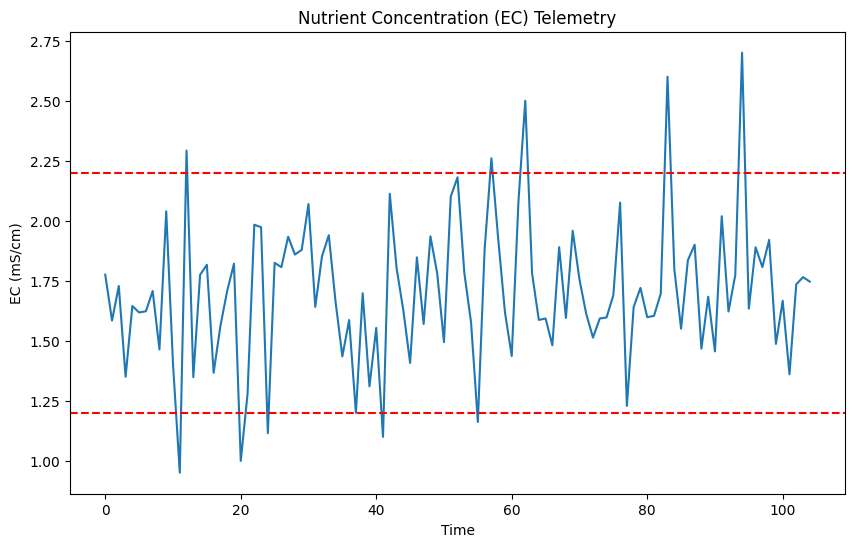

In [2]:
# Define the "healthy" and “Unhealthy” ranges for Nutrient concentration (EC)
ec_healthy_mean = 1.7  # Central value of the healthy range
ec_healthy_std_dev = 0.25  # Adjust for desired fluctuation

# Generate healthy data
ec_healthy_data = generate_data(ec_healthy_mean, ec_healthy_std_dev)

# Introduce some unhealthy data
ec_unhealthy_data = np.array([1.0, 1.1, 2.5, 2.6, 2.7])
ec_data = np.insert(ec_healthy_data, [20, 40, 60, 80, 90], ec_unhealthy_data)

plt.figure(figsize=(10, 6))
plt.plot(ec_data)
plt.axhline(y=1.2, color='r', linestyle='--')
plt.axhline(y=2.2, color='r', linestyle='--')
plt.title("Nutrient Concentration (EC) Telemetry")
plt.ylabel("EC (mS/cm)")
plt.xlabel("Time")
plt.show()


# Step 3: Plotting for Jupyter Notebooks
For a more interactive demonstration:

In [3]:
import ipywidgets as widgets

def plot_ec_data(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    plt.axhline(y=1.2, color='r', linestyle='--')
    plt.axhline(y=2.2, color='r', linestyle='--')
    plt.title("Nutrient Concentration (EC) Telemetry")
    plt.ylabel("EC (mS/cm)")
    plt.xlabel("Time")
    plt.show()

def update_ec_plot(shock_value):
    data = generate_data(ec_healthy_mean, ec_healthy_std_dev, size=95)
    unhealthy_data = np.array([shock_value]*5)
    full_data = np.insert(data, range(20, 25), unhealthy_data)
    plot_ec_data(full_data)

widgets.interact(update_ec_plot, shock_value=widgets.FloatSlider(value=1.7, min=0.8, max=3.0, step=0.1, description='Shock EC:'))


interactive(children=(FloatSlider(value=1.7, description='Shock EC:', max=3.0, min=0.8), Output()), _dom_class…

<function __main__.update_ec_plot(shock_value)>

# Step 4: Explanation & Analysis
Importance of the Parameter: Nutrient concentration (EC) is a measure of the total amount of soluble nutrients in the water. A correct EC level ensures the plant has the right amount of nutrients for growth.
Impact of Deviations: Too high EC can lead to nutrient burn, while too low EC can lead to nutrient deficiencies.
Potential Reasons for Deviation: Over-fertilization, evaporation leading to increased concentration, or under-fertilization.
Corrective Actions: Adjusting the nutrient solution concentration, flushing the system with fresh water, or recalibrating EC meters.
By following this approach, readers will gain a comprehensive understanding of the importance of nutrient concentration (EC) in cannabis cultivation.